<a href="https://colab.research.google.com/github/GunavathiC/ML_Algorithms/blob/main/K_Mean_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/environmental factors.csv')
print(df)

      temperature   humidity  ...  solar_irradiance  pollution_level
0       22.490802  52.418449  ...        369.020837        84.723658
1       34.014286  49.974726  ...        185.335998        49.451704
2       29.639879  40.569235  ...        213.723302        19.546561
3       26.973170  66.436000  ...        262.604015        73.664179
4       18.120373  58.597450  ...        283.288001        41.867814
...           ...        ...  ...               ...              ...
9995    32.153120  82.622318  ...        660.200681        96.614073
9996    32.950177  32.808837  ...        303.574216        37.323996
9997    33.934158  48.221908  ...        774.095576        30.467486
9998    22.949760  56.599200  ...        568.909821        40.736253
9999    19.342808  40.335889  ...        875.536039        52.283339

[10000 rows x 6 columns]


In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
print(pd.DataFrame(df_scaled,columns=df.columns).head())

   temperature  humidity  ...  solar_irradiance  pollution_level
0    -0.415900 -0.452465  ...         -0.684316         1.193409
1     1.587377 -0.593258  ...         -1.389866        -0.029923
2     0.826917 -1.135149  ...         -1.280827        -1.067119
3     0.363328  0.355146  ...         -1.093072         0.809835
4    -1.175669 -0.096466  ...         -1.013623        -0.292954

[5 rows x 6 columns]


In [ ]:
inertia =[]
k_range = range(1,11)

for k in k_range:
  kmeans = KMeans(n_clusters=k,random_state=42)
  kmeans.fit(df_scaled)
  inertia.append(kmeans.inertia_)




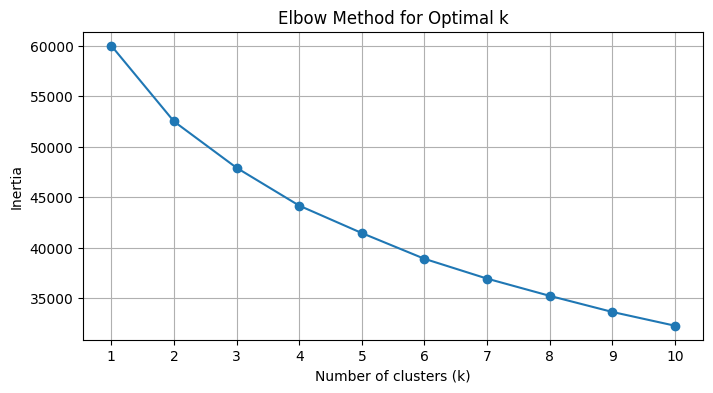

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [ ]:
k =7
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)


#
print(df.head())



   temperature   humidity  ...  pollution_level  Cluster
0    22.490802  52.418449  ...        84.723658        6
1    34.014286  49.974726  ...        49.451704        5
2    29.639879  40.569235  ...        19.546561        6
3    26.973170  66.436000  ...        73.664179        4
4    18.120373  58.597450  ...        41.867814        6

[5 rows x 7 columns]


In [ ]:
#calculate silhouette
sil_score = silhouette_score(df_scaled, df['Cluster'])
print('Silhouette Score:{sil_score}')

Silhouette Score:{sil_score}


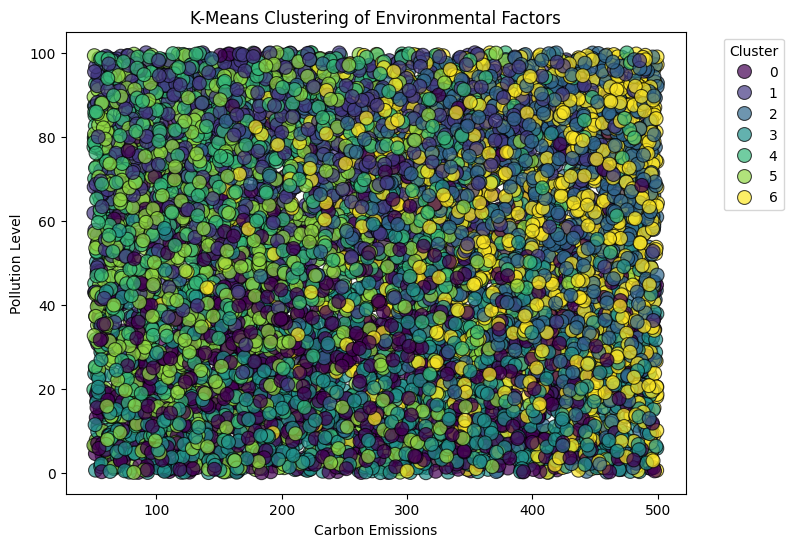

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
# Create a scatter plot with the cluster labels
sns.scatterplot(x='carbon_emissions', y='pollution_level', hue='Cluster',
                data=df, palette='viridis', s=100, alpha=0.7, edgecolor='k')
# Title and labels
plt.title('K-Means Clustering of Environmental Factors')
plt.xlabel('Carbon Emissions')
plt.ylabel('Pollution Level')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
# Display the plot
plt.show()

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

In [26]:
# 1. Generate systhetic datset

X,y = make_blobs(n_samples=500, centers=4, cluster_std=1.2, random_state=42)

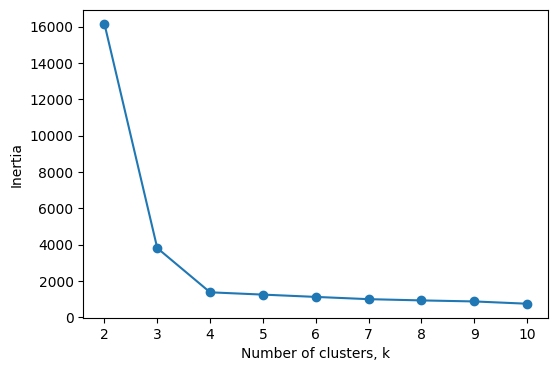

In [27]:
inertia = []
k_values = range(2,11)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.show()

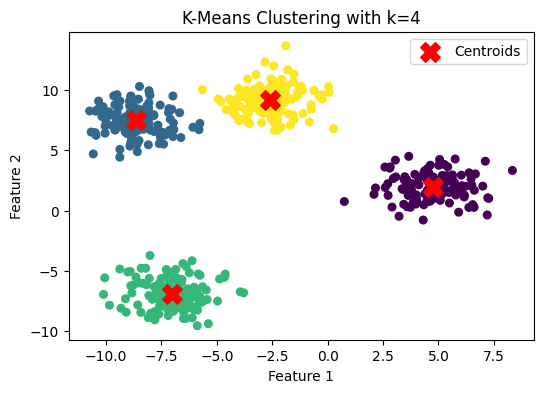

In [28]:
optimal_k = 4  # (you can choose based on elbow & silhouette)
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
y_kmeans = kmeans.fit_predict(X)

plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1], c=y_kmeans, cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c='red', marker='X', s=200, label='Centroids')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"K-Means Clustering with k={optimal_k}")
plt.legend()
plt.show()